# UKF Simple Demo

此次试验的模型，首先它是一维的，易于直观理解其原理，另外可以发现此模型的状态方程式线性的，观测方程是非线性的，取此测试模型是刻意的。这样可以体现UKF另一个好处，即UKF和标准卡尔曼滤波，甚至EKF可以“混用”，是不是很好玩呢。

$$
x_{k+1} = x_k
$$

$$
y_{k+1} = \sqrt{x_{k+1}}
$$

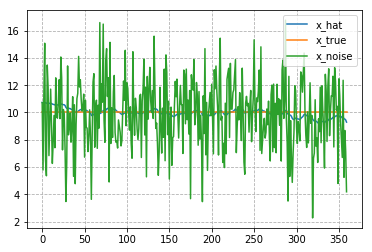

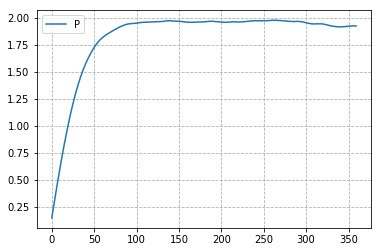

In [2]:
#!/usr/bin/env python
# coding: utf-8

import math
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

_ls_x_true = []
_ls_y = []
_ls_x_noise = []
DATA_ROWS = 360
X_true = 10
for i in range(DATA_ROWS):
    _ls_x_true.append(X_true)
    noise_s = np.random.normal(loc=0, scale=2.5)
    x_with_noise = X_true+noise_s
    _ls_x_noise.append(x_with_noise)
    _ls_y.append(sqrt(x_with_noise))


_Xs = _ls_y[0]**2
_P = 0.1
_Q = 0.05
R = 2

kapa = 0.2
alpha = 0.9
L = 1
beta = 2
lamb = alpha*alpha*(L+kapa)-L
w_c = 0.5/(alpha*alpha*(L+kapa))
w_m0 = lamb/(alpha*alpha*(L+kapa))
w_c0 = lamb/(alpha*alpha*(L+kapa))+1-alpha**2+beta

ls_x_hat = []
ls_P = []

for i in range(DATA_ROWS):
    # predict
    _Xs = _Xs
    _P = _P + _Q
    
    # correct
    x0 = _Xs
    x1 = _Xs + sqrt((L+lamb)*_P)
    x2 = _Xs - sqrt((L+lamb)*_P)

    y0 = sqrt(x0)
    y1 = sqrt(x1)
    y2 = sqrt(x2)
    
    y_hat = w_m0*y0 + w_c*y1+ w_c*y2
    y = _ls_y[i]
    s_hat = w_c0*(y_hat-y0)*(y_hat-y0)+w_c*(y_hat-y1)*(y_hat-y1)+w_c*(y_hat-y2)*(y_hat-y2)
    s_hat = s_hat + R
    
    C_sz = (x0-_Xs)*(y0-y_hat)*w_c0+(x1-_Xs)*(y1-y_hat)*w_c+(x2-_Xs)*(y2-y_hat)*w_c
    
    
    K_k = C_sz/s_hat
    _Xs = _Xs + K_k*(y - y_hat)
    
    _P = _P - K_k*s_hat*K_k
    ls_P.append(_P)
    
    ls_x_hat.append(_Xs)

plt.plot(ls_x_hat,label='x_hat')
plt.plot(_ls_x_true,label='x_true')
plt.plot(_ls_x_noise,label='x_noise')
plt.legend()
plt.grid(True)
plt.grid(linestyle='--')
plt.show()

plt.plot(ls_P,label='P')
plt.legend()
plt.grid(True)
plt.grid(linestyle='--')
plt.show()